# Análisis de entrada

Jesus Davidad Macias T00042139 

Realizar análisis a los datos suministrados.

-Verificar IID.

-Encontrar la distribución de probabilidad que mejor se ajusta a los datos.


Pendiente (B1): -1.3082608695652174
Intercepto (B1) 87.92347826086956
Coeficiente de correlación: -0.23668618891467122
Valor p asociado a B1: 0.27688253796525614
Error estándar de B1: 1.171906877908306
R-Cuadrado: 0.056020352022951435


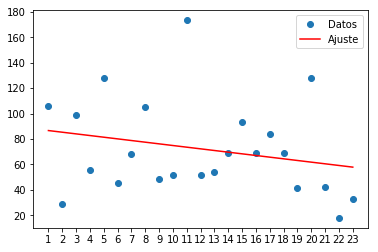

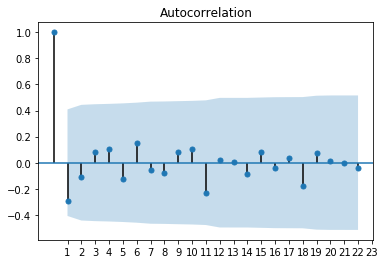

p value for expon = 0.17676106310204642
p value for gamma = 0.9466259040999688
p value for lognorm = 0.9655682669522782
p value for weibull_min = 0.9087973297905438
p value for weibull_max = 0.0
Best fitting distribution: lognorm
Best p value: 0.9655682669522782
Parameters for the best fit: (0.437708237173866, -10.517081406288641, 75.27652049855152)
('lognorm', 0.9655682669522782, (0.437708237173866, -10.517081406288641, 75.27652049855152))


In [3]:
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
from re import findall
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf,acf
from statsmodels.tsa import stattools

#Nombre de las distribuciones
cdfs = [
    "expon",           #Exponential
    "gamma",           #Gamma
    "lognorm",         #Log-Normal
    "weibull_min",     #Minimum Weibull (see Frechet)
    "weibull_max",     #Maximum Weibull (see Frechet)
    ]      
def read():#leemos los datos del data.txt que seran nuestros y
    data = []
    with open("data.txt") as d:
        for i in d.readlines():
            data.append(findall(r"[\d]+.[\d]+", i))
    return np.array(data, dtype=float)

def generar_x(y):#función que nos genera los valores de x 
    x=np.array([[i+1] for i in range(len(y))])
    return x

def estimated_autocorrelation(x):
    n = len(x)
    variance = x.var()
    x = x-x.mean()
    r = np.correlate(x, x, mode = 'full')
    result = r/(variance*n)
    return result[result.size//2:]


def get_best_distribution(data):
    dist_results = []
    params = {}
    for dist_name in cdfs:
        dist = getattr(stats, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = stats.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

if __name__ == "__main__":

    data = read()
    y=data #datos y 
    datos_x=generar_x(y)
    x=datos_x#datos x
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x[:,0], y[:,0])
    print("Pendiente (B1):",slope)
    print("Intercepto (B1)", intercept)
    print("Coeficiente de correlación:", r_value)
    print("Valor p asociado a B1:", p_value)
    print("Error estándar de B1:" , std_err)
    print("R-Cuadrado:", r_value**2)

    plt.plot(x,y,'o',label='Datos')
    plt.plot(x, intercept + slope*x, 'r', label='Ajuste')
    plt.xticks(x)
    plt.legend()
    plt.show()

    plot_acf(y[:,0])
    plt.xticks(x)
    plt.show()

    print(get_best_distribution(y[:,0]))